Data analysis by: Ezekiel Stevens, Cavid Karca and Merijn van Moorsel

In this notebook we investigate the change in population of arthropods. We try to find out what is causing this change in population. For this we use a dataset of arthropod population collected between 2008 and 2017 which also has data on climate and agriculture nearby the arthropod habitats.

In [ ]:
import scipy as sc
import numpy as np
from scipy.stats import norm
import seaborn as sns

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

url = "https://raw.githubusercontent.com/Caviid/DataAnalysis/main/25786.txt"
arthropod_dataset = pd.read_csv(url,index_col=0,delimiter="\t") #load data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


EDA and cleaning up the data:

In [ ]:
arthropod_dataset = arthropod_dataset[arthropod_dataset['Sampling_regime'] == 'annual'] 
arthropod_dataset['plot'] = arthropod_dataset.index 

forest_data = arthropod_dataset.filter(like = 'forest', axis=0)
forest_data = forest_data[forest_data['Sampling_regime'] == 'annual'] 



grassland_data = arthropod_dataset.filter(like = 'grassland', axis=0)
grassland_data = grassland_data[grassland_data['Sampling_regime'] == 'annual'] 




In [ ]:
#from heatmap import heatmap, corrplot

columns = ['biomass', 'species', 'abundance_identified', 'mean_winter_temperature', 'precipitation_sum_growing_preriod', 'grassland_cover_250', 'grassland_cover_1500', 'arable_cover_250', 'arable_cover_1500', 'landuse_intensity', 'biomass_strong_disperser', 'biomass_weak_disperser'] 
corr = arthropod_dataset[columns]

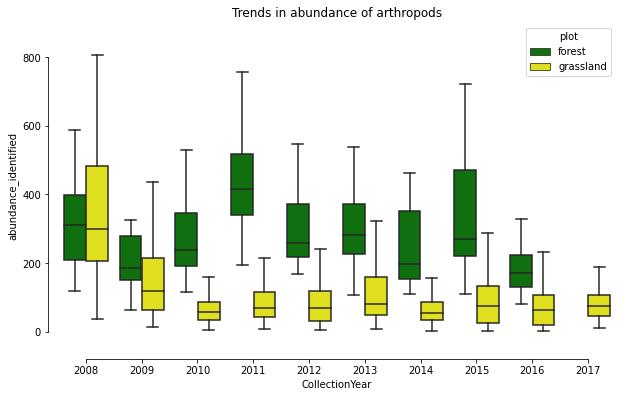

In [ ]:
ax = sns.boxplot(x="CollectionYear", y="abundance_identified",
            hue="plot", palette=["green", "yellow"],
            data=arthropod_dataset, showfliers = False)
ax.set(ylim=(-50, 900))
ax.set(title="Trends in abundance of arthropods")
sns.despine(offset=10, trim=True)

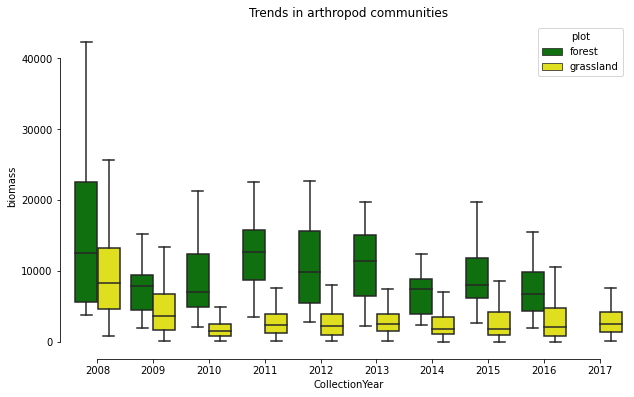

In [ ]:
ax = sns.boxplot(x="CollectionYear", y="biomass",
            hue="plot", palette=["green", "yellow"],
            data=arthropod_dataset, showfliers = False)
ax.set(ylim=(-1000, 45000 ))
ax.set(title='Trends in arthropod communities')

sns.despine(offset=10, trim=True)

These figures were created to see if the arthropod population was actually declining. And from them we can conclude that the grassland does show a decline, but the forest population does not show a clear decline.

In [ ]:
arthropod_dataset['arable_cover_1000'].describe()

count    1672.000000
mean       26.961340
std        20.102858
min         0.000000
25%        10.680000
50%        26.000000
75%        41.610000
max        90.450000
Name: arable_cover_1000, dtype: float64

In [ ]:
grassland_data.describe()

,CollectionYear,biomass,abundance_unidentified_identified,abundance_identified,species,abundance_carnivore,species_carnivore,biomass_carnivore,abundance_herbivore,species_herbivore,biomass_herbivore,abundance_detritomycetophage,species_detritomycetophage,biomass_detritomycetophage,abundance_omnivore,species_omnivore,biomass_omnivore,abundance_weak_disperser,species_weak_disperser,biomass_weak_disperser,abundance_strong_disperser,species_strong_disperser,biomass_strong_disperser,landuse_intensity,mean_winter_temperature,precipitation_sum_growing_preriod,grassland_cover_250,grassland_cover_500,grassland_cover_1000,grassland_cover_1500,arable_cover_1000,arable_cover_1500,arable_cover_250,arable_cover_500
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,2012.415363,4009.258440,614.899004,127.176387,24.268137,7.470128,4.578236,263.666057,115.970128,18.086060,3669.637031,0.997866,0.392603,2.570368,2.737553,1.210526,73.384983,21.322191,3.558321,4009.258440,7.163585,1.596017,1518.161610,1.643656,1.092790,539.649474,60.253713,43.812006,32.633023,28.250562,30.467937,32.067326,19.241323,26.162838
std,2.857895,5246.855498,615.195393,179.121045,10.950809,6.833570,2.791815,350.354795,175.722064,8.863961,5126.698165,3.202423,0.710512,10.631603,5.374790,1.231174,156.991558,49.655361,2.397020,5246.855498,31.283759,1.456984,3156.478680,0.561559,1.512352,156.947968,24.364895,20.680981,15.450783,13.213171,19.692273,19.137171,19.908146,20.867092
min,2008.000000,3.364362,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.364362,0.000000,0.000000,0.000000,0.520000,-2.597615,259.960000,0.000000,2.110000,3.610000,3.280000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,1201.828051,277.750000,41.000000,17.000000,3.000000,3.000000,52.243864,33.000000,12.000000,930.553324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1201.828051,1.000000,1.000000,76.443869,1.280000,-0.212518,401.320000,44.470000,27.010000,20.080000,18.530000,14.580000,16.050000,0.010000,9.800000
50%,2012.000000,2451.353422,449.000000,78.000000,23.000000,6.000000,4.000000,143.324325,67.000000,17.000000,2091.379451,0.000000,0.000000,0.000000,1.000000,1.000000,21.783803,8.000000,3.000000,2451.353422,2.000000,1.000000,593.080715,1.660000,0.873894,518.155000,62.290000,40.970000,33.110000,28.065000,29.720000,30.280000,13.180000,24.040000
75%,2015.000000,4762.369122,740.750000,147.000000,30.000000,10.000000,6.000000,350.853056,132.000000,23.000000,4430.006386,1.000000,1.000000,0.606501,3.000000,2.000000,70.931717,20.000000,5.000000,4762.369122,6.000000,2.000000,1598.980988,1.980000,2.364376,637.585000,80.830000,59.515000,43.540000,37.510000,42.542500,43.970000,33.020000,39.660000
max,2017.000000,72297.902750,8640.000000,2785.000000,77.000000,112.000000,20.000000,3987.585059,2754.000000,56.000000,71072.010929,49.000000,4.000000,164.423719,65.000000,9.000000,1555.943086,768.000000,14.000000,72297.902750,764.000000,10.000000,58723.634613,3.280000,5.916894,928.260000,100.000000,95.300000,76.210000,62.960000,90.450000,85.110000,90.660000,84.980000


About the correlation between abundance and climate:

In [ ]:
bin_labels = ['min', '25%', '50%', '75%', 'max']
grassland_data['quartile_labeled'] = pd.qcut(grassland_data['arable_cover_1000'],
                              q=5,
                              labels=bin_labels)
grassland_min = grassland_data[grassland_data['quartile_labeled'] == 'min'] 
grassland_25 = grassland_data[grassland_data['quartile_labeled'] == '25%'] 
grassland_50 = grassland_data[grassland_data['quartile_labeled'] == '50%'] 
grassland_75 = grassland_data[grassland_data['quartile_labeled'] == '75%'] 
grassland_max = grassland_data[grassland_data['quartile_labeled'] == 'max'] 

In [ ]:
import statsmodels.formula.api as sm
model_max = sm.ols(formula = "abundance_identified ~ CollectionYear + mean_winter_temperature + precipitation_sum_growing_preriod", data = grassland_max).fit()
model_min = sm.ols(formula = "abundance_identified ~ CollectionYear + mean_winter_temperature + precipitation_sum_growing_preriod", data = grassland_min).fit()

In [ ]:
#Model predicting the abundance of all the arthropods based on the collection year, average winter temperature and rainfall in the summer
model_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     abundance_identified   R-squared:                       0.182
Model:                              OLS   Adj. R-squared:                  0.173
Method:                   Least Squares   F-statistic:                     20.69
Date:                  Tue, 23 Mar 2021   Prob (F-statistic):           3.92e-12
Time:                          13:41:16   Log-Likelihood:                -1989.4
No. Observations:                   283   AIC:                             3987.
Df Residuals:                       279   BIC:                             4001.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           9.27e+04   1.22e+04      7.573      0.000    6.86e+04    1.17e+05
CollectionYear                      -46.0545      6.085     -7.568      0.000     -58.033     -34.076
mean_winter_temperature              64.0207     13.721      4.666      0.000      37.012      91.030
precipitation_sum_growing_preriod     0.1705      0.126      1.355      0.177      -0.077       0.418
==============================================================================
Omnibus:                      302.880   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10445.864
Skew:                           4.583   Prob(JB):                         0.00
Kurtosis:                      31.317   Cond. No.                     1.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.formula.api as sm
model_max_spe = sm.ols(formula = "species ~ CollectionYear + mean_winter_temperature + precipitation_sum_growing_preriod", data = grassland_min_spe).fit()
model_min_spe = sm.ols(formula = "species ~ CollectionYear + mean_winter_temperature + precipitation_sum_growing_preriod", data = grassland_min_spe).fit()

In [ ]:
model_min_spe.summary()
#Model predicting the species of all the arthropods based on the collection year, average winter temperature and rainfall in the summer

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                species   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     15.93
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.38e-09
Time:                        15:21:52   Log-Likelihood:                -1048.3
No. Observations:                 283   AIC:                             2105.
Df Residuals:                     279   BIC:                             2119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          2624.5705    440.158      5.963      0.000    1758.119    3491.022
CollectionYear                       -1.2941      0.219     -5.915      0.000      -1.725      -0.863
mean_winter_temperature               2.6925      0.493      5.458      0.000       1.721       3.664
precipitation_sum_growing_preriod     0.0061      0.005      1.346      0.179      -0.003       0.015
==============================================================================
Omnibus:                       11.754   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.035
Skew:                           0.470   Prob(JB):                      0.00244
Kurtosis:                       3.370   Cond. No.                     1.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the models above the abundance identified and species were predicted by Collection Year, mean winter temperature, and mean summer precipitation. As the P-values show, both collection year and mean winter temperature have a influence on the arthropod population, while summer precipitation has low influence on the population. Higher winter temperatures increase the population while a later collection year correlates with a smaller population.

About the correlation between arable land and abundance:

In [ ]:
regression_min = model_min.predict(grassland_min)
regression_max = model_max.predict(grassland_max)

In [ ]:
min_df = pd.DataFrame(regression_min,columns=['regression'])
min_df.insert(value = grassland_min['CollectionYear'], column = 'year', loc = 0)

In [ ]:
max_df = pd.DataFrame(regression_max,columns=['regression'])
max_df.insert(value = grassland_max['CollectionYear'], column = 'year', loc = 0)

In [ ]:
min_mean = min_df.groupby('year').mean()
min_mean
min_mean = min_mean.drop(labels=2017, axis=0)

In [ ]:
max_mean = max_df.groupby('year').mean()
max_mean = max_mean.drop(labels=2017, axis=0)
max_mean

,regression
year,
2008,224.206998
2009,145.358778
2010,110.624707
2011,82.535546
2012,98.935302
2013,73.005314
2014,103.075966
2015,63.798477
2016,80.455204


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS                  Adj. R-squared:     0.191    
Dependent Variable: abundance_identified AIC:                2114.9633
Date:               2021-03-23 13:41     BIC:                2121.3492
No. Observations:   180                  Log-Likelihood:     -1055.5  
Df Model:           1                    F-statistic:        43.39    
Df Residuals:       178                  Prob (F-statistic): 4.89e-10 
R-squared:          0.196                Scale:              7338.4   
----------------------------------------------------------------------
                     Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------------
Intercept           218.4636  11.3560 19.2377 0.0000 196.0539 240.8733
arable_cover_1500    -2.1575   0.3276 -6.5868 0.0000  -2.8039  -1.5111
----------------------------------------------------------------------
Omnibus:               39.086         Durbin-Watson:            1.136 
Prob(Omnibus):         0.000          Jarque-Bera (JB):         61.490
Skew:                  1.155          Prob(JB):                 0.000 
Kurtosis:              4.692          Condition No.:            62    
======================================================================

"""

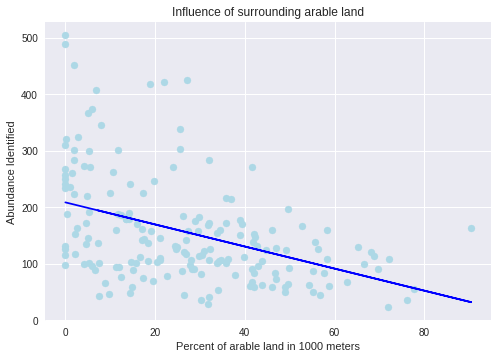

In [ ]:
arthropod_mean = arthropod_dataset.groupby("PlotID").mean()
test_model = sm.ols(formula="abundance_identified ~ arable_cover_1500", data=arthropod_mean).fit()
reg = test_model.predict(arthropod_mean)
agr = "arable_cover_1000"
plt.scatter(arthropod_mean[agr],arthropod_mean["abundance_identified"],color='lightblue')
m,b = np.polyfit(arthropod_mean[agr],reg,1)
plt.plot(arthropod_mean[agr],m*arthropod_mean[agr]+b,color='blue')
plt.xlabel("Percent of arable land in 1000 meters")
plt.ylabel("Abundance Identified")
plt.title("Influence of surrounding arable land")
test_model.summary2()
#Plot about the correlation between arable land proximity and abundance

This model is used to predict abundance_identified based on the percent of arable land within 1000 meters of the plot. From it we can say that a higher amount of arable land correlates with a lower abundance_identified. A dot on this figure represents a plot of land where the abundance_identified and the a percentage of arable land are averages over the years.

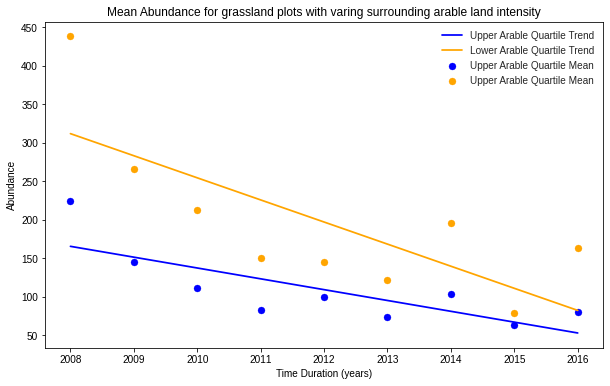

In [ ]:
fig, ax = plt.subplots()
#ax.set_yscale('log')
plt.style.use('seaborn')
plt.scatter(max_mean.index.values, max_mean['regression'],label='Upper Arable Quartile Mean', color='Blue')
plt.scatter(min_mean.index.values, min_mean['regression'], label='Upper Arable Quartile Mean', color='Orange')
plt.plot(np.unique(max_mean.index.values), np.poly1d(np.polyfit(max_mean.index.values, max_mean['regression'], 1))(np.unique(max_mean.index.values)), label='Upper Arable Quartile Trend', color='Blue')
plt.plot(np.unique(min_mean.index.values), np.poly1d(np.polyfit(min_mean.index.values, min_mean['regression'], 1))(np.unique(min_mean.index.values)),  label='Lower Arable Quartile Trend', color='Orange')
plt.xlabel("Time Duration (years)")
plt.ylabel("Abundance")
plt.title("Mean Abundance for grassland plots with varing surrounding arable land intensity")

plt.legend()
#Plot about the abundance of arthropods where lower quartile and upper quartile of arable land(most and least arable) are compared

To further investigate the influence of arable land on arthropod populations, the data was divided in quartiles. In this graph the abundance in quartiles with the lowest and highest amount of arable land were plotted. In the figure the dots represent the average abundance of the plot in a given year. Then it can be seen that plots with lower amounts of arable land have a higher abundance. Still the abundance drops over the year on both plots with high and low arable land.

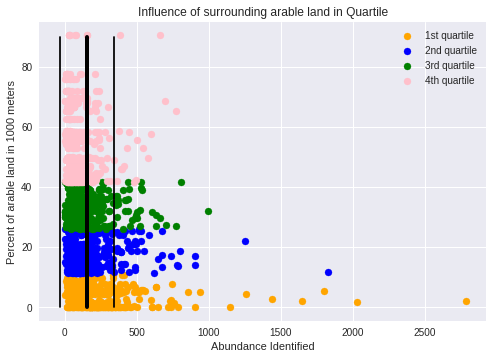

In [ ]:
#TODO Add in an average line for the abundance.
arthropod_dataset_q = arthropod_dataset
bin_labels_q = ['1', '2', '3', '4']

arthropod_dataset_q['quartile_labeled'] = pd.qcut(arthropod_dataset_q['arable_cover_1000'],
                              q=4,
                              labels=bin_labels_q)
q1 = arthropod_dataset_q[arthropod_dataset_q['quartile_labeled'] == '1'] 
q2 = arthropod_dataset_q[arthropod_dataset_q['quartile_labeled'] == '2'] 
q3 = arthropod_dataset_q[arthropod_dataset_q['quartile_labeled'] == '3'] 
q4 = arthropod_dataset_q[arthropod_dataset_q['quartile_labeled'] == '4'] 

mean = arthropod_dataset_q['abundance_identified'].mean()
std = arthropod_dataset_q['abundance_identified'].std()


yyy =  [0,90]
plt.plot([mean,mean],yyy, color="black",linewidth=4)

plt.plot([mean-std,mean-std],yyy,color="black")
plt.plot([mean+std,mean+std],yyy,color="black")


plt.scatter(q1["abundance_identified"],q1["arable_cover_1000"],color='orange',label="1st quartile")
plt.scatter(q2["abundance_identified"],q2["arable_cover_1000"],color='Blue',label="2nd quartile")
plt.scatter(q3["abundance_identified"],q3["arable_cover_1000"],color='green',label="3rd quartile")
plt.scatter(q4["abundance_identified"],q4["arable_cover_1000"],color='pink',label="4th quartile")

plt.ylabel("Percent of arable land in 1000 meters")
plt.xlabel("Abundance Identified")
plt.title("Influence of surrounding arable land in Quartile")
plt.legend()
#Plot dividing the plots into quartiles of proximity of arable land and comparing abundance between those quartiles

In this plot the four different colours represent the four different quartiles of arable land, where the 1st quartile represents the lowest amount of arable land and the 4th quartile represents the highest. Also the thick black line represents the average abundance and the thinner black lines are the standard deviations from it. As can be seen, most plots with very high abundance are on the first quartile. While in 4th quartile no plot has a high abundance.

In [ ]:
regression_min_spe = model_min_spe.predict(grassland_min)
regression_max_spe = model_max_spe.predict(grassland_max)

In [ ]:
min_df_spe = pd.DataFrame(regression_min_spe,columns=['regression_spe'])
min_df_spe.insert(value = grassland_min_spe['CollectionYear'], column = 'year', loc = 0)

In [ ]:
max_df_spe = pd.DataFrame(regression_max_spe,columns=['regression_spe'])
max_df_spe.insert(value = grassland_max_spe['CollectionYear'], column = 'year', loc = 0)

In [ ]:
min_mean_spe = min_df_spe.groupby('year').mean()
min_mean
min_mean_spe = min_mean_spe.drop(labels=2017, axis=0)

In [ ]:
max_mean_spe = max_df_spe.groupby('year').mean()
max_mean_spe = max_mean_spe.drop(labels=2017, axis=0)
max_mean_spe

,regression_spe
year,
2008,37.263180
2009,28.913092
2010,25.890966
2011,23.767042
2012,26.591676
2013,24.389223
2014,28.889508
2015,25.415349
2016,28.236061


In [ ]:
#Method to get the mean trend of the data series
def mean(data, name, interval):
    total = []
    years = []
    for year in range(2008, 2017, interval):
        total.append(data[data["CollectionYear"] == year][name].mean())
        years.append(year)
    return total
#Method to get the means that are about the species biomass, abundance and species amount + landuse intensity and mean winter temperature
def all_mean(data_frame_source, data_frame, interval):
    data_frame["year"] = range(2008, 2017, interval)
    inter = ""
    if(interval == 3):
        inter = "three_year_interval"
    else:
        inter = "annual"
    for a in range(5, 30):
        data_frame[data_frame_source.iloc[:,a].name] = mean(data_frame_source[data_frame_source["Sampling_regime"] == inter], data_frame_source.iloc[:,a].name, interval)
    return data_frame

In [ ]:
grass_yearly = all_mean(grassland_data, pd.DataFrame(), 1)
forest_yearly = all_mean(forest_data, pd.DataFrame(), 1)



In [ ]:
def fit(years, data):
    d = np.polyfit(years, data, 1)
    f = np.poly1d(d)
    return pd.Series(f(years))
def plot_fit(original, year, title=""):
    regressed = fit(year, original)
    frame = pd.DataFrame()
    frame["year"] = year;
    frame["mean " + original.name] = original
    frame["regressed"] = regressed
    ax = frame.plot.scatter(x="year", y="mean " + original.name, title=title)
    frame.plot(x="year", y="regressed", color="Blue", ax=ax)


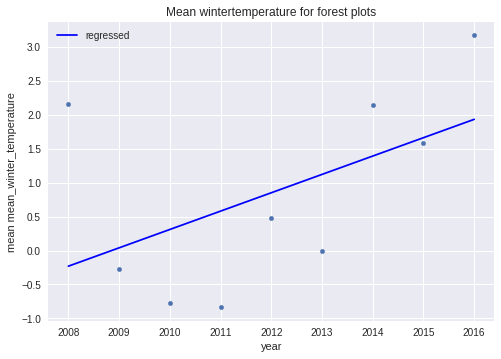

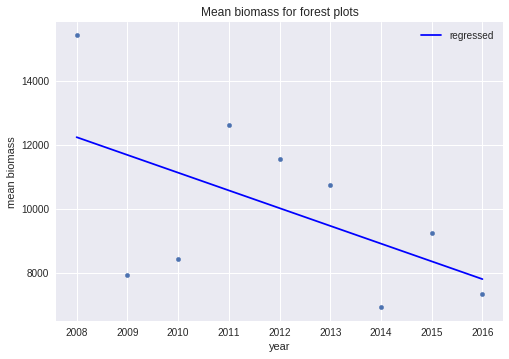

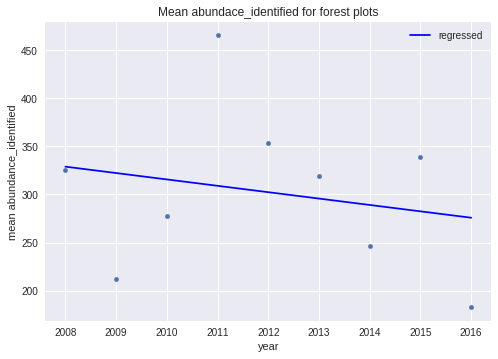

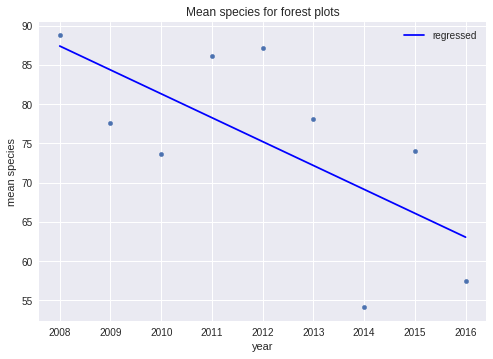

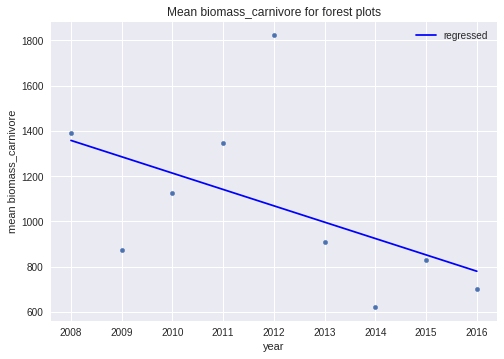

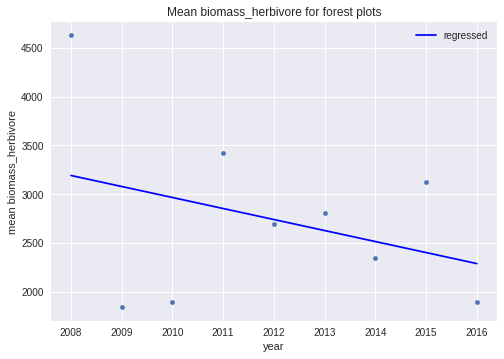

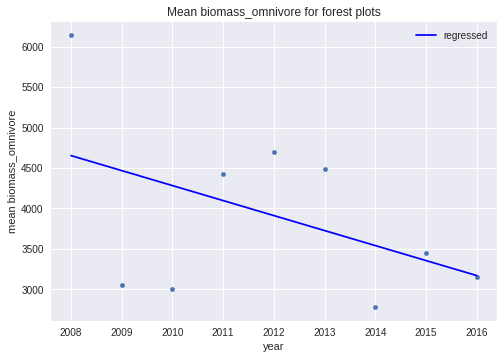

In [ ]:
#Some plots about the trend the forest biomass followed compared to the winter temperature
plot_fit(forest_yearly["mean_winter_temperature"], forest_yearly["year"], title="Mean wintertemperature for forest plots")
plot_fit(forest_yearly["biomass"], forest_yearly["year"], title = "Mean biomass for forest plots")
plot_fit(forest_yearly["abundance_identified"], forest_yearly["year"], title="Mean abundace_identified for forest plots")
plot_fit(forest_yearly["species"], forest_yearly["year"], title="Mean species for forest plots")
plot_fit(forest_yearly["biomass_carnivore"], forest_yearly["year"], title="Mean biomass_carnivore for forest plots")
plot_fit(forest_yearly["biomass_herbivore"], forest_yearly["year"], title="Mean biomass_herbivore for forest plots")
plot_fit(forest_yearly["biomass_omnivore"], forest_yearly["year"], title="Mean biomass_omnivore for forest plots")


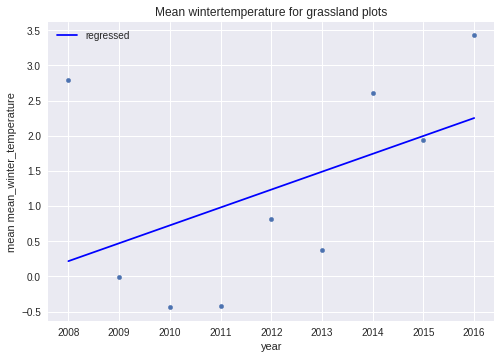

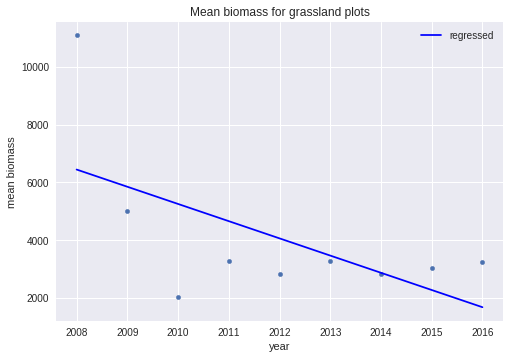

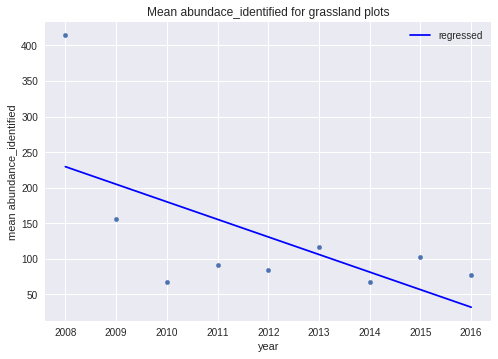

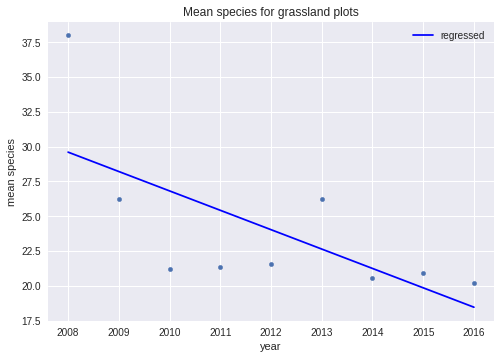

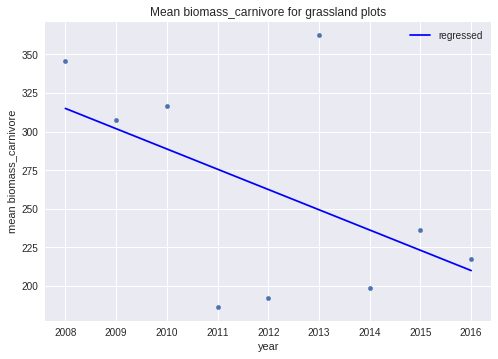

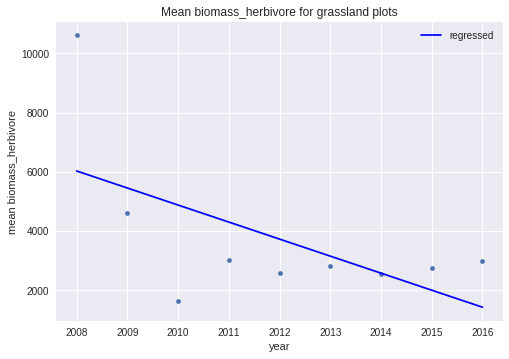

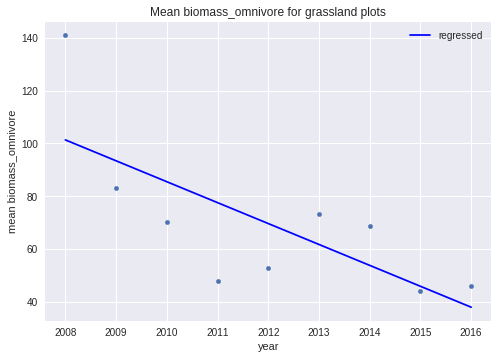

In [ ]:
#Some plots about the trend the grassland biomass followed compared to the winter temperature
plot_fit(grass_yearly["mean_winter_temperature"], grass_yearly["year"], title="Mean wintertemperature for grassland plots")
plot_fit(grass_yearly["biomass"], grass_yearly["year"], title = "Mean biomass for grassland plots")
plot_fit(grass_yearly["abundance_identified"], forest_yearly["year"], title="Mean abundace_identified for grassland plots")
plot_fit(grass_yearly["species"], grass_yearly["year"], title="Mean species for grassland plots")
plot_fit(grass_yearly["biomass_carnivore"], grass_yearly["year"], title="Mean biomass_carnivore for grassland plots")
plot_fit(grass_yearly["biomass_herbivore"], grass_yearly["year"], title="Mean biomass_herbivore for grassland plots")
plot_fit(grass_yearly["biomass_omnivore"], grass_yearly["year"], title="Mean biomass_omnivore for grassland plots")

Both the grassland and forest population saw a big decline in the winter of 2009 when the winter temperature reached below 0 °C on average. The population in the forest plots seems to have recovered somewhat, where the grassland population remained the same after that year.

#Conclusion
Our goal was to investigate the change in the arthropod population and what the contributing factors are to this change. We found that the arthropod population has been declining between 2008 and 2017. It can be seen that winter temperatures increased over those years, which should be good for the arthropod population. But in that same period the population still declined. One contributing factor to this decline seems to be agriculture, since plots with more agriculture close to them had lower population sizes.

References:

Biodiversity exploratories information system. (n.d.). Retrieved March 22, 2021, from http://www.bexis1.uni-jena.de/PublicD...​

Seibold, S., Gossner, M. M., Simons, N. K., Blüthgen, N., Müller, J., Ambarlı, D., . . . Weisser, W. W. (2019). Arthropod decline in grasslands and forests is associated with landscape-level drivers. Nature, 574(7780), 671-674. doi:10.1038/s41586-019-1684-3

Daskalova, G. N., Phillimore, A. B., &amp; Myers‐Smith, I. H. (2021). Accounting for year effects and sampling error in TEMPORAL analyses of INVERTEBRATE population and BIODIVERSITY change: A comment on seibold et al . 2019. Insect Conservation and Diversity, 14(1), 149-154. doi:10.1111/icad.12468